### Algorithmic Trading 

In [1]:
#import packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import ccxt 
import time
from datetime import datetime
import plotly.graph_objects as go
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager

import yfinance as yf


In [152]:
#get testnet key and secret from testnet binance
key = 'ZT6j9cVi03zdNaVZaq8anCvIF86eH5vyJhAfh4YCFRCgRRra6zP297hOxfRX9Zwc'
secret = 'ABzCXOJ41tI0OAOKBUu8hPqDbLKP1JYxRc6jsYjgPmy5RTXF6q7IYYtbWalVkQnL'

In [153]:
client =  Client(key, secret,tld='us',testnet=True) #connect to testnet server

In [154]:
#get account balance 
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'canTrade': True,
 'canWithdraw': False,
 'canDeposit': False,
 'updateTime': 1645818240201,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BNB',
   'free': '1000.00000000',
   'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.02000000', 'locked': '0.00000000'},
  {'asset': 'BUSD', 'free': '10000.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '100.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '500.00000000', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '500000.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '10303.36439717', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '50000.00000000', 'locked': '0.00000000'}],
 'permissions': ['SPOT']}

In [155]:
prices = client.get_all_tickers()
prices[7]

{'symbol': 'BTCUSDT', 'price': '43496.65000000'}

In [156]:
klines = client.get_historical_klines("BNBBTC", Client.KLINE_INTERVAL_1MINUTE, "1 day ago UTC")

In [157]:
klines

[[1646036340000,
  '0.00957800',
  '0.00958300',
  '0.00957600',
  '0.00958300',
  '7.25000000',
  1646036399999,
  '0.06944586',
  13,
  '7.25000000',
  '0.06944586',
  '0'],
 [1646036400000,
  '0.00958000',
  '0.00958400',
  '0.00958000',
  '0.00958400',
  '4.48000000',
  1646036459999,
  '0.04292764',
  6,
  '4.48000000',
  '0.04292764',
  '0'],
 [1646036460000,
  '0.00957800',
  '0.00957900',
  '0.00957700',
  '0.00957900',
  '6.66000000',
  1646036519999,
  '0.06379076',
  12,
  '6.66000000',
  '0.06379076',
  '0'],
 [1646036520000,
  '0.00957700',
  '0.00957800',
  '0.00957700',
  '0.00957800',
  '1.11000000',
  1646036579999,
  '0.01063102',
  2,
  '1.11000000',
  '0.01063102',
  '0'],
 [1646036580000,
  '0.00957100',
  '0.00957200',
  '0.00957100',
  '0.00957200',
  '2.18000000',
  1646036639999,
  '0.02086631',
  4,
  '2.18000000',
  '0.02086631',
  '0'],
 [1646036640000,
  '0.00957000',
  '0.00957600',
  '0.00957000',
  '0.00957600',
  '4.71000000',
  1646036699999,
  '0.0450

In [158]:
#get historical 
client.get_historical_klines(symbol='BTCUSDT',interval='1d',start_str='02-10-2022',end_str='02-27-2022')

[[1644451200000,
  '44373.15000000',
  '45770.30000000',
  '8828.00000000',
  '43490.00000000',
  '1644.14944000',
  1644537599999,
  '72928631.18991979',
  123067,
  '1191.76507700',
  '52936720.14559075',
  '0'],
 [1644537600000,
  '43495.43000000',
  '218764.00000000',
  '8596.00000000',
  '42373.73000000',
  '1413.42900000',
  1644623999999,
  '60978432.49072689',
  130020,
  '966.97528300',
  '41777106.66513091',
  '0'],
 [1644624000000,
  '42373.74000000',
  '212541.00000000',
  '8557.00000000',
  '42217.74000000',
  '1659.49916500',
  1644710399999,
  '70179155.14663697',
  168038,
  '967.66972000',
  '40943716.52396786',
  '0'],
 [1644710400000,
  '42217.74000000',
  '198620.92000000',
  '10000.00000000',
  '42053.55000000',
  '1645.02078500',
  1644796799999,
  '69561774.19055532',
  168858,
  '939.22023900',
  '39744211.61065232',
  '0'],
 [1644796800000,
  '42053.55000000',
  '209732.00000000',
  '8493.00000000',
  '42532.27000000',
  '2002.17853300',
  1644883199999,
  '846

In [159]:
df = yf.download("BTC-USD",interval='1d', start="2021-12-01", end="2021-12-30") # get data from yahoo finance

[*********************100%***********************]  1 of 1 completed


In [160]:
df = df.reset_index()

In [161]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-01,56907.964844,59041.683594,56553.082031,57229.828125,57229.828125,36858195307
1,2021-12-02,57217.371094,57349.234375,55895.132812,56477.816406,56477.816406,32379968686
2,2021-12-03,56509.164062,57482.167969,52496.585938,53598.246094,53598.246094,39789134215
3,2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,49200.703125,61385677469
4,2021-12-05,49201.519531,49768.148438,47857.496094,49368.847656,49368.847656,37198201161
5,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,50582.625000,37707308001
6,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,33676814852
7,2021-12-08,50667.648438,51171.375000,48765.988281,50504.796875,50504.796875,28479699446
8,2021-12-09,50450.082031,50797.164062,47358.351562,47672.121094,47672.121094,29603577251
9,2021-12-10,47642.144531,50015.253906,47023.699219,47243.304688,47243.304688,30966005122


In [162]:
yf.download(tickers = 'BTC-USD' ,period ='7d', interval = '1m')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-02-23 00:00:00+00:00,38285.281250,38285.281250,38285.281250,38285.281250,38285.281250,0
2022-02-23 00:02:00+00:00,38282.878906,38282.878906,38282.878906,38282.878906,38282.878906,0
2022-02-23 00:04:00+00:00,38252.925781,38252.925781,38252.925781,38252.925781,38252.925781,0
2022-02-23 00:05:00+00:00,38250.460938,38250.460938,38250.460938,38250.460938,38250.460938,0
2022-02-23 00:06:00+00:00,38254.707031,38254.707031,38254.707031,38254.707031,38254.707031,0
...,...,...,...,...,...,...
2022-03-01 08:09:00+00:00,43466.535156,43466.535156,43466.535156,43466.535156,43466.535156,0
2022-03-01 08:11:00+00:00,43442.941406,43442.941406,43442.941406,43442.941406,43442.941406,0
2022-03-01 08:12:00+00:00,43440.816406,43440.816406,43440.816406,43440.816406,43440.816406,0


In [163]:
#lets plot the historical data 
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [164]:
#build a quick trading strategy using RSI 
delta = df['Adj Close'].diff(1)
delta.dropna(inplace=True)

In [165]:
delta

1     -752.011719
2    -2879.570312
3    -4397.542969
4      168.144531
5     1213.777344
6      117.460938
7     -195.289062
8    -2832.675781
9     -428.816406
10    2119.203125
11     735.828125
12   -3360.855469
13    -124.847656
14    2284.089844
15   -1231.296875
16   -1463.281250
17     646.632812
18    -141.761719
19     173.261719
20    2056.335938
21    -308.101562
22    2156.027344
23      37.656250
24    -392.335938
25     379.656250
26    -169.097656
27   -3051.562500
28   -1144.144531
29     733.414062
Name: Adj Close, dtype: float64

In [166]:
positive = delta.copy()
negative = delta.copy()

In [167]:
positive[positive < 0] = 0

In [168]:
negative[negative > 0] = 0

In [169]:
days = 14

In [170]:
#average gain/loss
average_gain = positive.rolling(days).mean()
average_loss = abs(negative.rolling(days).mean())

In [171]:
retative_strength = average_gain / average_loss

In [172]:
RSI = 100 - (100/(1+retative_strength))

In [173]:
df['RSI'] = RSI

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       30 non-null     datetime64[ns]
 1   Open       30 non-null     float64       
 2   High       30 non-null     float64       
 3   Low        30 non-null     float64       
 4   Close      30 non-null     float64       
 5   Adj Close  30 non-null     float64       
 6   Volume     30 non-null     int64         
 7   RSI        16 non-null     float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 2.0 KB


In [175]:
df['Date'] = pd.to_datetime(df['Date'])

In [176]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,RSI
0,2021-12-01,56907.964844,59041.683594,56553.082031,57229.828125,57229.828125,36858195307,NaN
1,2021-12-02,57217.371094,57349.234375,55895.132812,56477.816406,56477.816406,32379968686,NaN
2,2021-12-03,56509.164062,57482.167969,52496.585938,53598.246094,53598.246094,39789134215,NaN
3,2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,49200.703125,61385677469,NaN
4,2021-12-05,49201.519531,49768.148438,47857.496094,49368.847656,49368.847656,37198201161,NaN
5,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,50582.625000,37707308001,NaN
6,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,33676814852,NaN
7,2021-12-08,50667.648438,51171.375000,48765.988281,50504.796875,50504.796875,28479699446,NaN
8,2021-12-09,50450.082031,50797.164062,47358.351562,47672.121094,47672.121094,29603577251,NaN
9,2021-12-10,47642.144531,50015.253906,47023.699219,47243.304688,47243.304688,30966005122,NaN


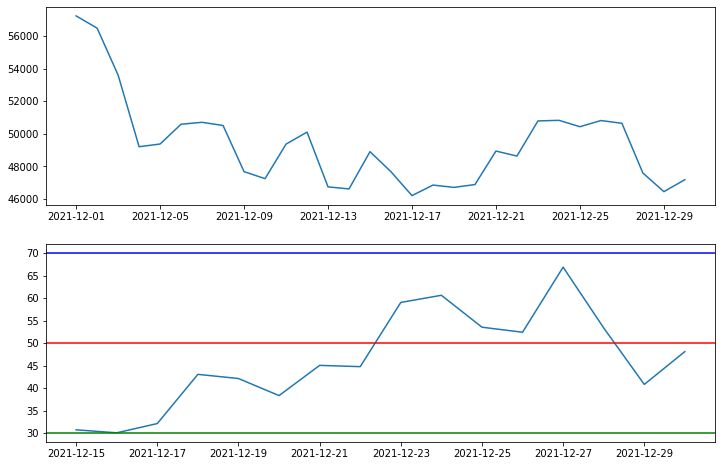

In [177]:
#plot the results 
plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax1.plot(df['Date'],df['Close'])


ax1 = plt.subplot(212)
ax1.plot(df['Date'],df['RSI'])
plt.axhline(y=50, color='r', linestyle='-')
plt.axhline(y=70, color='b', linestyle='-')
plt.axhline(y=30, color='g', linestyle='-')
plt.show()

In [178]:
#create strategy rules for RSI -> long when rsi 
buy_price = []
sell_price = []
for i in range(len(df)):
    if df['RSI'][i] >= 65:
        sell_price.append(df['Adj Close'][i])
        buy_price.append(np.nan)
    elif df['RSI'][i] <= 35:
        buy_price.append(df['Adj Close'][i])
        sell_price.append(np.nan)
    else:
        sell_price.append(np.nan)
        buy_price.append(np.nan)

In [179]:
df['buy_price'] = buy_price
df['sell_price'] = sell_price


In [183]:

df['Long'] = np.where(df['RSI'] < 35,1,0)
df['Short'] = np.where(df['RSI'] > 65,1,0)
df['Long'] = df['Long'].diff() 
df['Short'] = df['Short'].diff() 


df['Long'] = [1 if x ==1 else 0 for x in df['Long']]
df['Short'] = [-1 if x ==1 else 0 for x in df['Short']]
df['Signal'] = df['Long'] + df['Short']
df['Signal'] = df['Signal'].diff() 

In [184]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,buy_price,sell_price,Long,Short,Signal
0,2021-12-01,56907.964844,59041.683594,56553.082031,57229.828125,57229.828125,36858195307,NaN,NaN,NaN,0,0,NaN
1,2021-12-02,57217.371094,57349.234375,55895.132812,56477.816406,56477.816406,32379968686,NaN,NaN,NaN,0,0,0.0
2,2021-12-03,56509.164062,57482.167969,52496.585938,53598.246094,53598.246094,39789134215,NaN,NaN,NaN,0,0,0.0
3,2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,49200.703125,61385677469,NaN,NaN,NaN,0,0,0.0
4,2021-12-05,49201.519531,49768.148438,47857.496094,49368.847656,49368.847656,37198201161,NaN,NaN,NaN,0,0,0.0
5,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,50582.625000,37707308001,NaN,NaN,NaN,0,0,0.0
6,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,33676814852,NaN,NaN,NaN,0,0,0.0
7,2021-12-08,50667.648438,51171.375000,48765.988281,50504.796875,50504.796875,28479699446,NaN,NaN,NaN,0,0,0.0
8,2021-12-09,50450.082031,50797.164062,47358.351562,47672.121094,47672.121094,29603577251,NaN,NaN,NaN,0,0,0.0
9,2021-12-10,47642.144531,50015.253906,47023.699219,47243.304688,47243.304688,30966005122,NaN,NaN,NaN,0,0,0.0


In [182]:
df['positions'] = df['MAsignal'].diff()

KeyError: 'MAsignal'

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,buy_price,sell_price,MAsignal,positions
0,2021-12-01,56907.964844,59041.683594,56553.082031,57229.828125,57229.828125,36858195307,NaN,NaN,NaN,0,NaN
1,2021-12-02,57217.371094,57349.234375,55895.132812,56477.816406,56477.816406,32379968686,NaN,NaN,NaN,0,0.0
2,2021-12-03,56509.164062,57482.167969,52496.585938,53598.246094,53598.246094,39789134215,NaN,NaN,NaN,0,0.0
3,2021-12-04,53727.878906,53904.679688,42874.617188,49200.703125,49200.703125,61385677469,NaN,NaN,NaN,0,0.0
4,2021-12-05,49201.519531,49768.148438,47857.496094,49368.847656,49368.847656,37198201161,NaN,NaN,NaN,0,0.0
5,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,50582.625000,37707308001,NaN,NaN,NaN,0,0.0
6,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,33676814852,NaN,NaN,NaN,0,0.0
7,2021-12-08,50667.648438,51171.375000,48765.988281,50504.796875,50504.796875,28479699446,NaN,NaN,NaN,0,0.0
8,2021-12-09,50450.082031,50797.164062,47358.351562,47672.121094,47672.121094,29603577251,NaN,NaN,NaN,0,0.0
9,2021-12-10,47642.144531,50015.253906,47023.699219,47243.304688,47243.304688,30966005122,NaN,NaN,NaN,0,0.0


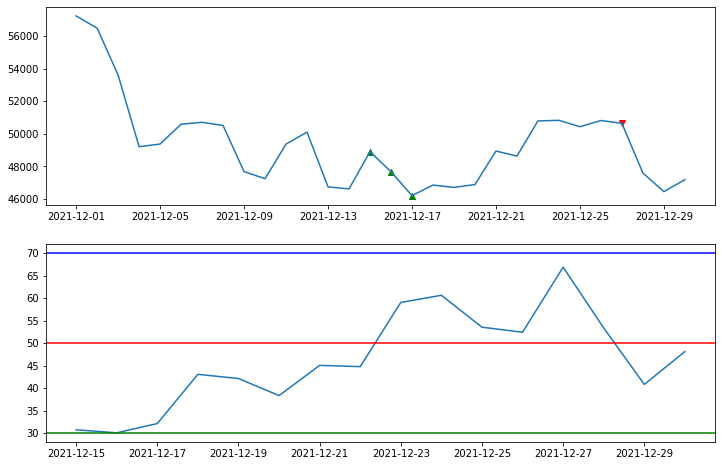

In [ ]:
plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax1.plot(df['Date'],df['Close'])
ax1.scatter(df['Date'],df['buy_price'],marker='^',color ='g')
ax1.scatter(df['Date'],df['sell_price'],marker='v',color ='r')

ax2 = plt.subplot(212)
ax2.plot(df['Date'],df['RSI'])

plt.axhline(y=50, color='r', linestyle='-')
plt.axhline(y=70, color='b', linestyle='-')
plt.axhline(y=30, color='g', linestyle='-')
plt.show()

In [ ]:
#get historical 

now = datetime.now()
klines =client.get_historical_klines(symbol='BTCUSDT',interval='15m',start_str='1 Feb,2022',end_str='now UTC')
data = pd.DataFrame(klines)
 # create colums name
data.columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']

In [ ]:
data['close_time'] = pd.to_datetime(data['open_time'],utc=True)

In [ ]:
data

,open_time,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
0,1643688900000,38556.58000000,38590.02000000,30000.00000000,38572.40000000,16.65170200,1970-01-01 00:27:23.688900+00:00,641585.73579872,582,12.29371000,473943.94136668,0
1,1643689800000,38570.91000000,38572.40000000,38470.38000000,38516.83000000,12.44946200,1970-01-01 00:27:23.689800+00:00,479445.45059380,577,12.37756900,476676.55110076,0
2,1643690700000,38516.84000000,38548.51000000,38491.65000000,38503.11000000,15.56128600,1970-01-01 00:27:23.690700+00:00,599429.07869835,360,13.40402000,516352.53169114,0
3,1643691600000,38504.43000000,38565.64000000,38504.43000000,38562.26000000,14.49124600,1970-01-01 00:27:23.691600+00:00,558487.52609830,474,11.75587100,453084.58182664,0
4,1643692500000,38562.26000000,38580.61000000,38475.70000000,38509.02000000,9.29916200,1970-01-01 00:27:23.692500+00:00,358360.09656798,377,7.82556600,301525.14909510,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2697,1646116200000,43333.71000000,43434.92000000,43242.30000000,43262.74000000,35.71772800,1970-01-01 00:27:26.116200+00:00,1548082.80311066,1411,20.47618700,887537.92808894,0
2698,1646117100000,43266.91000000,43472.34000000,43266.91000000,43447.16000000,33.15476500,1970-01-01 00:27:26.117100+00:00,1438389.33936352,1322,22.87761700,992537.32912969,0
2699,1646118000000,43448.13000000,43544.99000000,43431.94000000,43523.06000000,41.00961100,1970-01-01 00:27:26.118000+00:00,1783438.18425068,1577,27.34587500,1189213.86382441,0
2700,1646118900000,43533.71000000,43535.41000000,43340.70000000,43406.54000000,38.01624600,1970-01-01 00:27:26.118900+00:00,1651498.31292670,1461,20.79702300,903320.75012683,0


In [ ]:
twm = ThreadedWebsocketManager(api_key=key, api_secret=secret)
    # start is required to initialise its internal loop
twm.start()
    

In [4]:
def handle_socket_message(msg):
        print(f"message type: {msg['e']}")
        print(msg)
        print([''])

In [ ]:
twm.start_kline_socket(callback=handle_socket_message, symbol='BTCUSDT',interval='5m')

'btcusdt@kline_5m'

In [ ]:
twm.stop()

In [ ]:
pd.to_datetime(1646107560000, unit='ms')

Timestamp('2022-03-01 04:06:00')

In [10]:
btc_price = {'error':False}

In [22]:
def btc_trade_history(msg):
    ''' define how to process incoming WebSocket messages '''
    if msg['e'] != 'error':
        print(msg['k']['c'])
        btc_price['last'] = msg['k']['c']
        # btc_price['bid'] = msg['k']['b']
        btc_price['last'] = msg['k']['o']
        btc_price['error'] = False
    else:
        btc_price['error'] = True

In [23]:
def trader():
    key = 'ZT6j9cVi03zdNaVZaq8anCvIF86eH5vyJhAfh4YCFRCgRRra6zP297hOxfRX9Zwc'
    secret = 'ABzCXOJ41tI0OAOKBUu8hPqDbLKP1JYxRc6jsYjgPmy5RTXF6q7IYYtbWalVkQnL'
    twm = ThreadedWebsocketManager(api_key=key, api_secret=secret)
    # start is required to initialise its internal loop
    twm.start()    
    twm.start_kline_socket(callback=btc_trade_history, symbol='BTCUSDT',interval='1m')

In [24]:
trader()

41352.52000000
41352.51000000
41356.71000000
41356.71000000
41356.71000000
41362.03000000
41365.87000000
41365.87000000
41365.87000000
41365.87000000
41365.87000000
41368.75000000
41368.75000000
41368.75000000
41365.87000000


In [25]:
twm.stop()

NameError: name 'twm' is not defined

41365.88000000
41365.88000000
41365.88000000
41365.87000000
41365.28000000
41365.27000000
41365.87000000
41365.88000000
41368.03000000
41365.36000000
41365.36000000
41365.37000000
41365.37000000
41365.36000000
41365.37000000
41365.36000000
41365.37000000
41365.37000000
41365.37000000
41365.36000000
41365.37000000
41365.37000000
41365.37000000
41365.37000000
41365.36000000
41365.36000000
41365.37000000
41367.59000000
41367.59000000
41367.59000000
41367.59000000
41367.59000000
41367.58000000
41367.58000000
41367.58000000
41365.37000000
41365.37000000
41365.37000000
41365.37000000
41365.36000000
41365.26000000
41365.26000000
41365.27000000
41365.27000000
41365.26000000
41359.67000000
41357.37000000
41357.36000000
41356.72000000
41356.72000000
41356.72000000
41356.72000000
41356.72000000
41356.72000000
41356.71000000
41356.72000000
41356.72000000
41356.71000000
41357.37000000
41357.36000000
41357.36000000
41357.37000000
41357.36000000
41357.37000000
41357.37000000
41406.92000000
41404.5700

In [26]:
btc_price

{'error': False}

message type: kline
{'e': 'kline', 'E': 1646377058108, 's': 'BTCUSDT', 'k': {'t': 1646377020000, 'T': 1646377079999, 's': 'BTCUSDT', 'i': '1m', 'f': 1279690219, 'L': 1279690444, 'o': '41385.67000000', 'c': '41399.71000000', 'h': '41399.71000000', 'l': '41385.67000000', 'v': '10.45507000', 'n': 226, 'x': False, 'q': '432753.97442060', 'V': '8.82814000', 'Q': '365413.23204000', 'B': '0'}}
message type: kline
{'e': 'kline', 'E': 1646377058108, 's': 'BTCUSDT', 'k': {'t': 1646377020000, 'T': 1646377079999, 's': 'BTCUSDT', 'i': '1m', 'f': 1279690219, 'L': 1279690444, 'o': '41385.67000000', 'c': '41399.71000000', 'h': '41399.71000000', 'l': '41385.67000000', 'v': '10.45507000', 'n': 226, 'x': False, 'q': '432753.97442060', 'V': '8.82814000', 'Q': '365413.23204000', 'B': '0'}}
message type: kline
{'e': 'kline', 'E': 1646377060266, 's': 'BTCUSDT', 'k': {'t': 1646377020000, 'T': 1646377079999, 's': 'BTCUSDT', 'i': '1m', 'f': 1279690219, 'L': 1279690455, 'o': '41385.67000000', 'c': '41399.7100000